<a href="https://colab.research.google.com/github/aman-2k18/IDS_Project/blob/master/Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IDS Project
Aman Khandelwal              18UCC038

Rachit Dureja                18UCS037

Kavish Jain                  18UCS039

Ayush Talesra                18UCS038

In [ ]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data_set1 = pd.read_csv("https://raw.githubusercontent.com/Rachit1216/IDS_Project/master/datatest2.txt?token=AKQSPG5L6MZY2LCVATNIYS27YICUC")
data_set2 = pd.read_csv("https://raw.githubusercontent.com/Rachit1216/IDS_Project/master/datatest.txt?token=AKQSPG32X3GPJ6CJSPWLBS27YICT4")
training_set = pd.read_csv("https://raw.githubusercontent.com/Rachit1216/IDS_Project/master/datatraining.txt?token=AKQSPG2JS7BX57IKE2DE2627YICUI")

In [ ]:
data_set1.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
2,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
3,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
4,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
5,2015-02-11 14:51:59,21.7900,31.133333,437.333333,1005.666667,0.005030,1


In [ ]:
data_set1.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
9748,2015-02-18 09:15:00,20.815,27.7175,429.75,1505.25,0.004213,1
9749,2015-02-18 09:16:00,20.865,27.7450,423.50,1514.50,0.004230,1
9750,2015-02-18 09:16:59,20.890,27.7450,423.50,1521.50,0.004237,1
9751,2015-02-18 09:17:59,20.890,28.0225,418.75,1632.00,0.004279,1
9752,2015-02-18 09:19:00,21.000,28.1000,409.00,1864.00,0.004321,1


In [ ]:
data_set2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


As index is starting from 140 so the index has to be change to default.

In [ ]:
data_set2.index = np.arange(1,len(data_set2)+1)

In [ ]:
data_set2.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-02 14:19:00,23.7000,26.272,585.200000,749.200000,0.004764,1
2,2015-02-02 14:19:59,23.7180,26.290,578.400000,760.400000,0.004773,1
3,2015-02-02 14:21:00,23.7300,26.230,572.666667,769.666667,0.004765,1
4,2015-02-02 14:22:00,23.7225,26.125,493.750000,774.750000,0.004744,1
5,2015-02-02 14:23:00,23.7540,26.200,488.600000,779.000000,0.004767,1


In [ ]:
data_set2.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
2661,2015-02-04 10:38:59,24.290000,25.700000,808.0,1150.25,0.004829,1
2662,2015-02-04 10:40:00,24.330000,25.736000,809.8,1129.20,0.004848,1
2663,2015-02-04 10:40:59,24.330000,25.700000,817.0,1125.80,0.004841,1
2664,2015-02-04 10:41:59,24.356667,25.700000,813.0,1123.00,0.004849,1
2665,2015-02-04 10:43:00,24.408333,25.681667,798.0,1124.00,0.004860,1


In [ ]:
training_set.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


In [ ]:
training_set.tail()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
8139,2015-02-10 09:29:00,21.05,36.0975,433.0,787.250000,0.005579,1
8140,2015-02-10 09:29:59,21.05,35.9950,433.0,789.500000,0.005563,1
8141,2015-02-10 09:30:59,21.10,36.0950,433.0,798.500000,0.005596,1
8142,2015-02-10 09:32:00,21.10,36.2600,433.0,820.333333,0.005621,1
8143,2015-02-10 09:33:00,21.10,36.2000,447.0,821.000000,0.005612,1


This segment contains info of every data set..columns and type of each column(attribute) and the number of instances for each attribute

Check is there any missing value in any attribute.

In [ ]:
data_set1.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [ ]:
data_set1.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [ ]:
training_set.isnull().sum()

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

As there is no null values..so we dont have to remove any instance(row).

no. of columns,there data type,no. of instances(row),no. of attributes(column)

In [ ]:
data_set1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9752 entries, 1 to 9752
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 609.5+ KB


In [ ]:
data_set2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2665 entries, 1 to 2665
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2665 non-null   object 
 1   Temperature    2665 non-null   float64
 2   Humidity       2665 non-null   float64
 3   Light          2665 non-null   float64
 4   CO2            2665 non-null   float64
 5   HumidityRatio  2665 non-null   float64
 6   Occupancy      2665 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 166.6+ KB


In [ ]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


Describe

In [ ]:
data_set1.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [ ]:
data_set2.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000,2665.000000
mean,21.433876,25.353937,193.227556,717.906470,0.004027,0.364728
std,1.028024,2.436842,250.210906,292.681718,0.000611,0.481444
min,20.200000,22.100000,0.000000,427.500000,0.003303,0.000000
25%,20.650000,23.260000,0.000000,466.000000,0.003529,0.000000
50%,20.890000,25.000000,0.000000,580.500000,0.003815,0.000000
75%,22.356667,26.856667,442.500000,956.333333,0.004532,1.000000
max,24.408333,31.472500,1697.250000,1402.250000,0.005378,1.000000


In [ ]:
training_set.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


# **Box Plot**

Temperature attribute.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


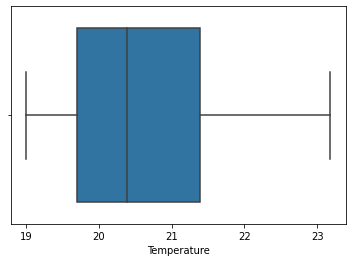

In [ ]:
sns.boxplot(training_set['Temperature'])

From graph we can see there is no outlier in Temperature.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


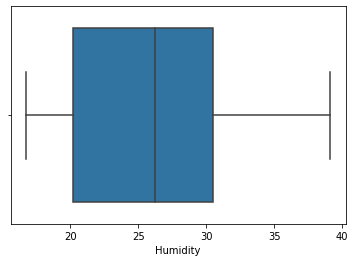

In [ ]:
sns.boxplot(training_set['Humidity'])

From graph we can see there is no outlier in Humidity.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


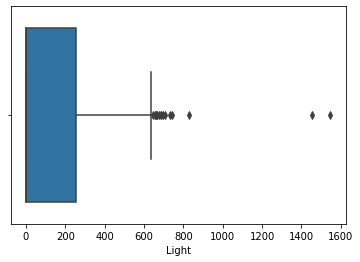

In [ ]:
sns.boxplot(training_set['Light'])

From above graph we can see there are outliers
So outliers are removed.







In [ ]:
# Finding the upper whisker limit for 'Light' attribute
Q3 = training_set.Light.quantile(.75) # 75th percentile
Q1 = training_set.Light.quantile(.25) # 25th percentile
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
print("Upper whisker limit:",UL)



Upper whisker limit: 640.9375


In [ ]:
training_set.shape

(8143, 7)

In [ ]:
training_set.drop(training_set[training_set['Light'] > UL].index, inplace = True)

In [ ]:
training_set.shape

(8128, 7)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


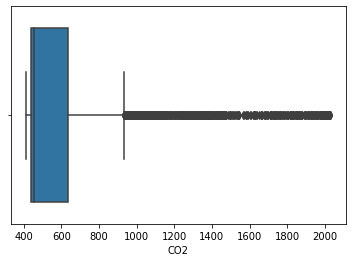

In [ ]:
sns.boxplot(training_set['CO2'])

From above graph we can see there are outliers
So outliers will be removed.







In [ ]:
# Finding the upper whisker limit for 'CO2' attribute
Q3 = training_set.CO2.quantile(.75) # 75th percentile
Q1 = training_set.CO2.quantile(.25) # 25th percentile
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
print("Upper whisker limit:",UL)



Upper whisker limit: 932.90625


In [ ]:
training_set.shape

(8128, 7)

In [ ]:
training_set.drop(training_set[training_set['CO2'] > UL].index, inplace = True)

In [ ]:
training_set.shape

(7063, 7)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


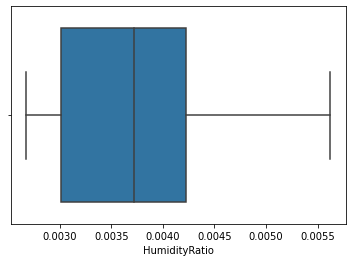

In [ ]:
sns.boxplot(training_set['HumidityRatio'])

From graph we can see there is no outlier in HumidityRatio.

As outliers has been removed..so resetting of index is done.

In [ ]:
training_set.index = np.arange(1,len(training_set)+1)

Check whether any two attributes are dependent and remove if it is required.

In [ ]:
# Is there any need to remove any attribute(column)(humidity and humidity ratio using corelation)
#corelation
# other graph
# occupancy vs every date
# %inline

# Visualising data via Graphs

In [ ]:
d1 = pd.to_datetime(data_set1['date'])
d2 = pd.to_datetime(data_set2['date'])
d3 = pd.to_datetime(training_set['date'])


<function matplotlib.pyplot.show>

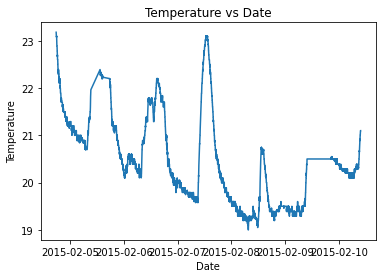

In [ ]:
x = d3.tolist()
y = training_set['Temperature'].tolist()
plt.plot(x,y)
plt.title("Temperature vs Date")
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.show

<function matplotlib.pyplot.show>

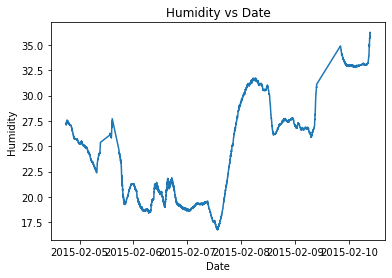

In [ ]:
x = d3.tolist()
y = training_set['Humidity'].tolist()
plt.plot(x,y)
plt.title("Humidity vs Date")
plt.xlabel("Date")
plt.ylabel("Humidity")
plt.show

<function matplotlib.pyplot.show>

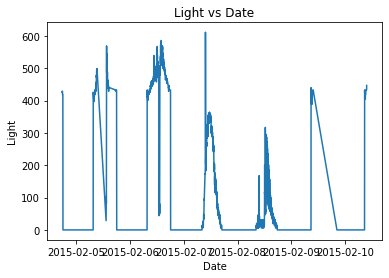

In [ ]:
x = d3.tolist()
y = training_set['Light'].tolist()
plt.plot(x,y)
plt.title("Light vs Date")
plt.xlabel("Date")
plt.ylabel("Light")
plt.show

<function matplotlib.pyplot.show>

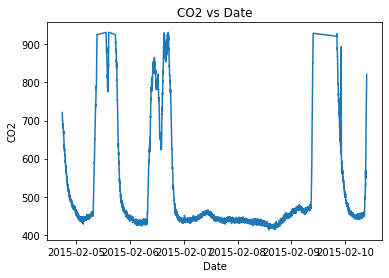

In [ ]:
x = d3.tolist()
y = training_set['CO2'].tolist()
plt.plot(x,y)
plt.title("CO2 vs Date")
plt.xlabel("Date")
plt.ylabel("CO2")
plt.show

<function matplotlib.pyplot.show>

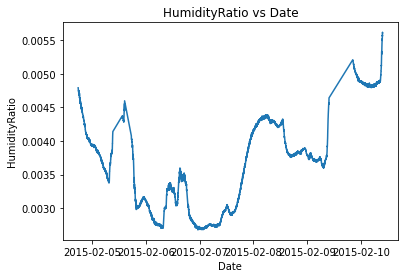

In [ ]:
x = d3.tolist()
y = training_set['HumidityRatio'].tolist()
plt.plot(x,y)
plt.title("HumidityRatio vs Date")
plt.xlabel("Date")
plt.ylabel("HumidityRatio")
plt.show

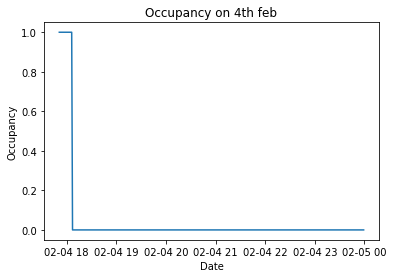

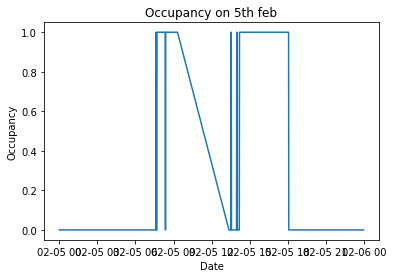

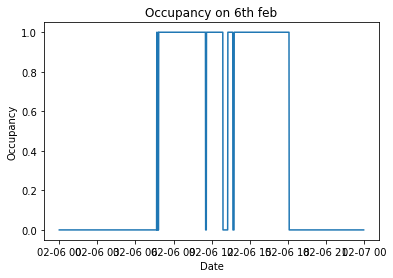

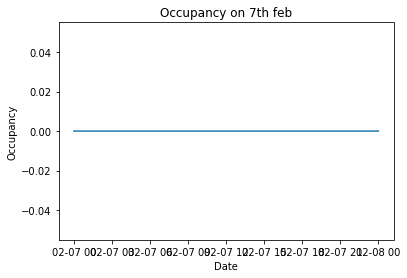

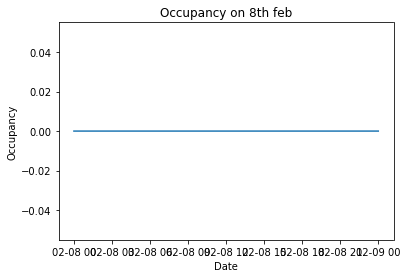

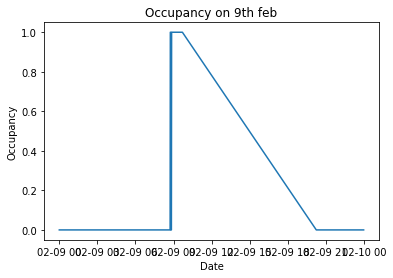

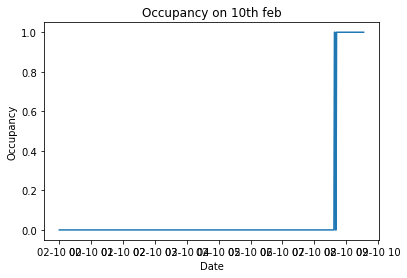

In [ ]:
a = int(training_set['date'].tolist()[0][8:10])

while True:
  x = []
  y = []
  counter = 0
  for i in range(len(training_set)):
    if(int(training_set.iloc[i]['date'][8:10]) == a):
        x.append(int(training_set.iloc[i]['Occupancy']))
        y.append(pd.to_datetime(training_set.iloc[i]['date']))
        counter = 1
  if(counter == 0):
     break    
  plt.plot(y,x)
  plt.title(f"Occupancy on {a}th feb")
  plt.xlabel("Date")
  plt.ylabel("Occupancy")
  plt.show()
  a+=1
  



    

Applying Different Classifier Algorithm.

**Logistic Regression**

In [ ]:
v1 = data_set1.values
X1,y1 = v1[:, 1:-1], v1[:, -1]
y1=y1.astype('int')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression


values = training_set.values
# split data into inputs and outputs
X, y = values[:, 1:-1], values[:, -1]
y=y.astype('int')
model = LogisticRegression()
model.fit(X,y)
res = model.predict(X1)
conf_matrix = confusion_matrix(y1, res)
score = accuracy_score(y1,res)
print(score*100)
conf_matrix

98.88228055783429


array([[7623,   80],
       [  29, 2020]])

**Naive Bayes Algorithm**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X,y)
res = nb.predict(X1)
score = accuracy_score(y1,res)
conf_matrix = confusion_matrix(y1, res)
print(score*100)
conf_matrix

90.71985233798195


array([[6807,  896],
       [   9, 2040]])

**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X,y)
res = tree.predict(X1)
conf_matrix = confusion_matrix(y1,res)
tree_acc_score = accuracy_score(y1,res)
print(conf_matrix)
print(tree_acc_score*100)

[[7560  143]
 [ 272 1777]]
95.74446267432322


**SVM**

In [ ]:
from sklearn.svm import SVC
lin_svc = SVC()
lin_svc.fit(X,y)
res=lin_svc.predict(X1)
conf_matrix = confusion_matrix(y1, res)
lin_svc_acc_score = accuracy_score(y1,res)
print(conf_matrix)
print(lin_svc_acc_score*100)

[[7507  196]
 [  96 1953]]
97.00574241181296


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X,y)
res=rf.predict(X1)
conf_matrix = confusion_matrix(y1,res)
acc_score = accuracy_score(y1, res)
print(conf_matrix)
print(acc_score*100)

[[7463  240]
 [  78 1971]]
96.73913043478261
